In [15]:
!pip install matplotlib scikit-image dlib


# 1. Introduction to Image Processing
a. Read and Display an Image

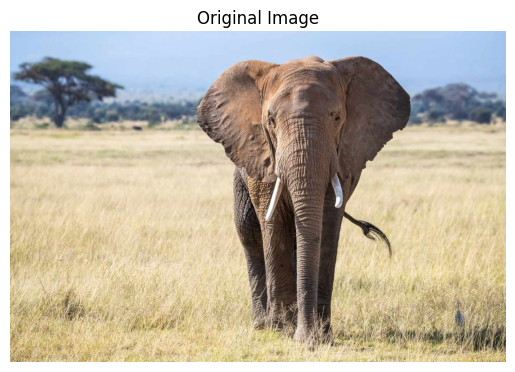

In [16]:
from skimage import io
import matplotlib.pyplot as plt

# Read the image
image = io.imread('input.jpg')

# Display the image
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()


b. Calculate and Print the Size of an Image in Pixels

In [17]:
height, width, channels = image.shape
print(f'Size: {width} x {height} pixels')

Size: 1500 x 1000 pixels


c. Convert a Color Image to Grayscale

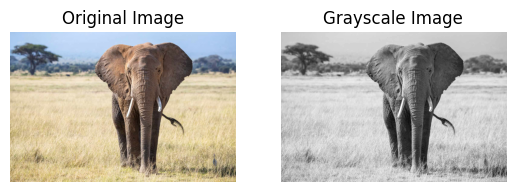

In [18]:
from skimage.color import rgb2gray

# Convert to grayscale
gray_image = rgb2gray(image)

# Display both the original and the grayscale image
fig, ax = plt.subplots(1, 2)
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(gray_image, cmap='gray')
ax[1].set_title('Grayscale Image')
ax[1].axis('off')

plt.show()


2. Image Manipulation

a. Resize, Crop, Rotate, and Flip an Image

Resized image shape (200, 200, 3)


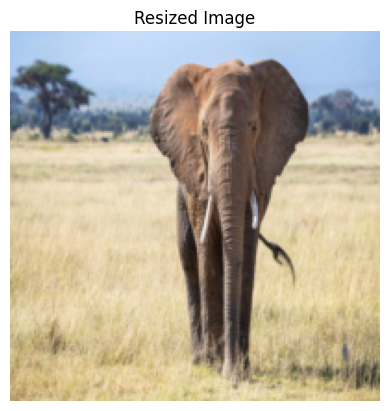

In [19]:
from skimage.transform import resize

resized_image = resize(image, (200, 200), anti_aliasing=True)
print("Resized image shape",resized_image.shape)
plt.imshow(resized_image)
plt.title('Resized Image')
plt.axis('off')
plt.show()


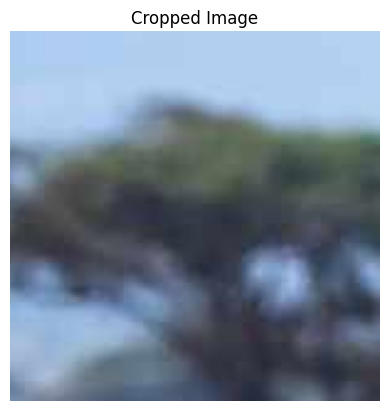

In [20]:
cropped_image = image[50:200, 50:200]
plt.imshow(cropped_image)
plt.title('Cropped Image')
plt.axis('off')
plt.show()


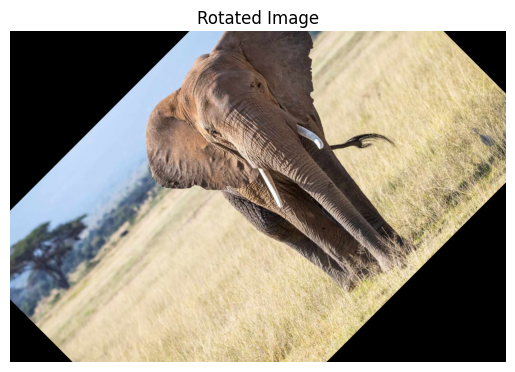

In [21]:
from skimage.transform import rotate

rotated_image = rotate(image, 45)
plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.axis('off')
plt.show()


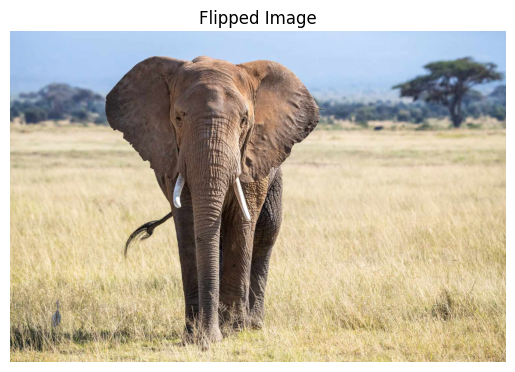

In [22]:
from skimage.util import img_as_ubyte

flipped_image = img_as_ubyte(image[:, ::-1])
plt.imshow(flipped_image)
plt.title('Flipped Image')
plt.axis('off')
plt.show()


b. Overlay One Image Onto Another

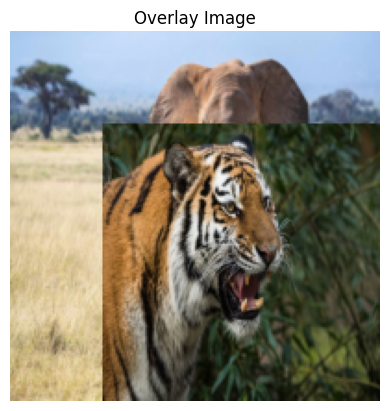

In [23]:
overlay_image = io.imread('1.jpg')
overlay_image = resize(overlay_image, (150, 150), anti_aliasing=True)

# Define the position
x_offset, y_offset = 50, 50

# Overlay the images
image_copy = resized_image.copy()
image_copy[y_offset:y_offset+overlay_image.shape[0], x_offset:x_offset+overlay_image.shape[1]] = overlay_image
plt.imshow(image_copy)
plt.title('Overlay Image')
plt.axis('off')
plt.show()


Blended image

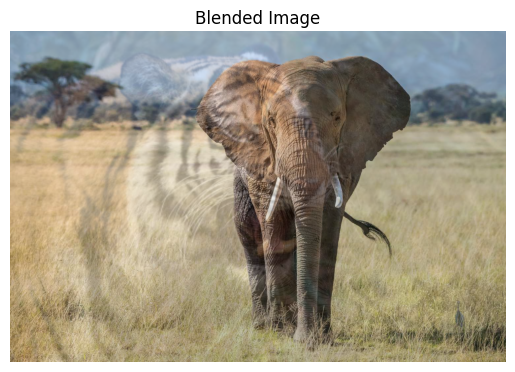

In [24]:
from skimage import io, img_as_float
from skimage.transform import resize
import matplotlib.pyplot as plt

# Read the images
image1 = io.imread('input.jpg')
image2 = io.imread('1.jpg')

# Convert images to float (range 0 to 1)
image1_float = img_as_float(image1)
image2_float = img_as_float(image2)

# Resize the second image to match the first image's dimensions
image2_resized = resize(image2_float, (image1_float.shape[0], image1_float.shape[1]), anti_aliasing=True)

# Blend the images
blended_image = 0.7 * image1_float + 0.3 * image2_resized

# Display the blended image
plt.imshow(blended_image)
plt.title('Blended Image')
plt.axis('off')
plt.show()


3. Image Filtering

a. 3x3 Mean Filter

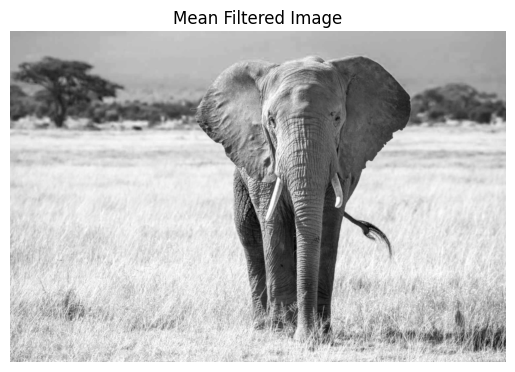

In [25]:
from skimage.filters import rank
from skimage.morphology import disk

mean_filtered_image = rank.mean(image[:, :, 0], disk(1))
plt.imshow(mean_filtered_image, cmap='gray')
plt.title('Mean Filtered Image')
plt.axis('off')
plt.show()


b. Sharpening Filter

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


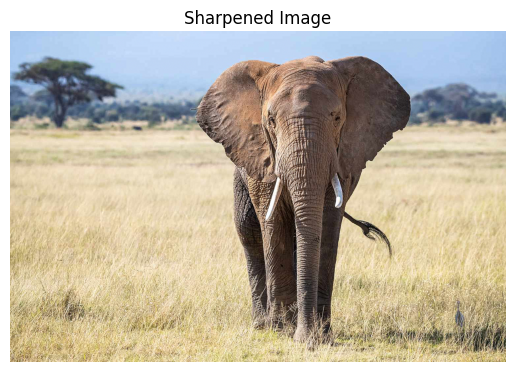

In [26]:
from skimage.filters import unsharp_mask

sharpened_image = unsharp_mask(image, radius=1, amount=1)
plt.imshow(sharpened_image)
plt.title('Sharpened Image')
plt.axis('off')
plt.show()


c. Median Filter

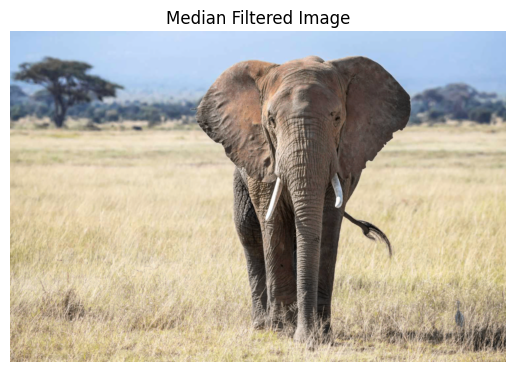

In [27]:
from skimage.filters import median

median_filtered_image = median(image)
plt.imshow(median_filtered_image)
plt.title('Median Filtered Image')
plt.axis('off')
plt.show()


4. Image Thresholding

a. Global Thresholding

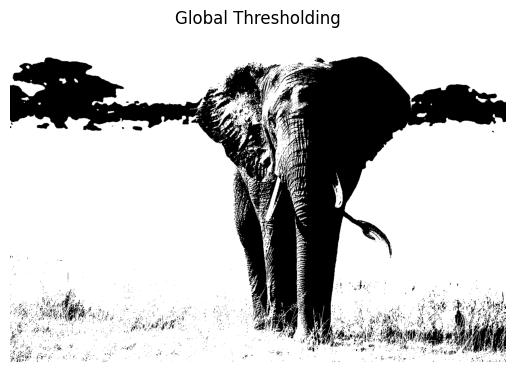

In [28]:
from skimage.filters import threshold_otsu

global_thresh_value = threshold_otsu(gray_image)
global_thresh = gray_image > global_thresh_value
plt.imshow(global_thresh, cmap='gray')
plt.title('Global Thresholding')
plt.axis('off')
plt.show()


b. Adaptive Thresholding

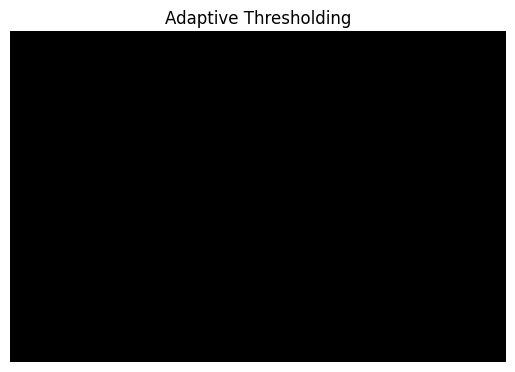

In [29]:
from skimage.filters import threshold_local

block_size = 35
adaptive_thresh = gray_image > threshold_local(gray_image, block_size, offset=5)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')
plt.show()


c. Otsu's Thresholding

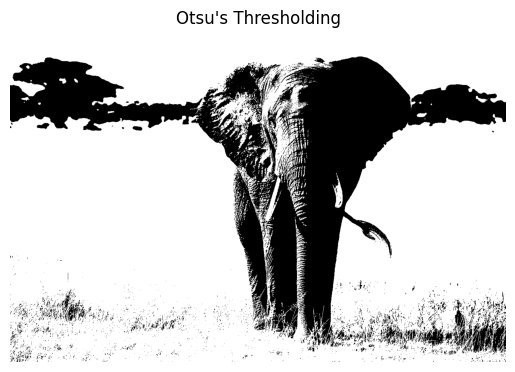

In [30]:
otsu_thresh_value = threshold_otsu(gray_image)
otsu_thresh = gray_image > otsu_thresh_value
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis('off')
plt.show()


5. Face Detection'

a. Harris Corner Detector

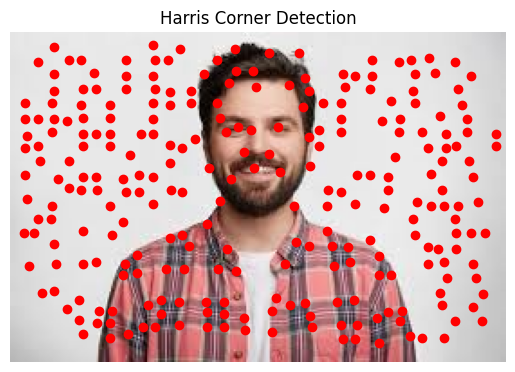

In [31]:
from skimage.feature import corner_harris, corner_peaks

# Read the image
image = io.imread('person.jpeg')

# Convert to grayscale
gray_image = rgb2gray(image)

corners = corner_peaks(corner_harris(gray_image), min_distance=5)
plt.imshow(image)
plt.plot(corners[:, 1], corners[:, 0], 'ro')
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()


b. Canny Edge Detector

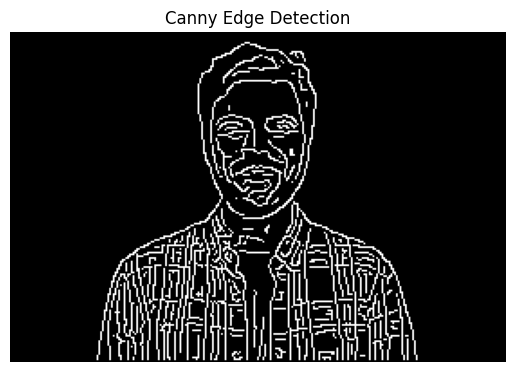

In [32]:
from skimage.feature import canny

edges = canny(gray_image, sigma=1.0)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()


c. Face Detection Using Cascade Classifier

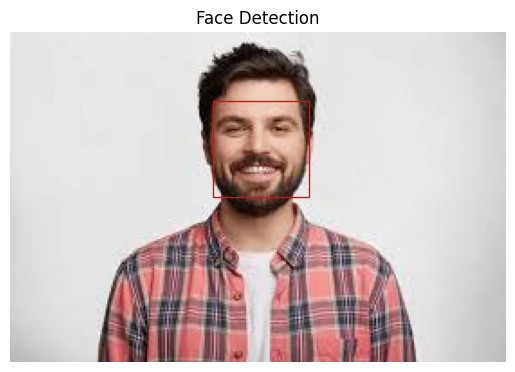

In [33]:
#i am exploring dlib
import dlib
from skimage import io, color, img_as_ubyte
import matplotlib.pyplot as plt

# Load a pre-trained face detector
detector = dlib.get_frontal_face_detector()

# Read the image
image = io.imread('/content/person.jpeg')

gray_image = color.rgb2gray(image)
gray_image = img_as_ubyte(gray_image)

# Detect faces
detected_faces = detector(gray_image, 1)

# Plot the image and draw rectangles around detected faces
fig, ax = plt.subplots()
ax.imshow(image)

for face in detected_faces:
    x, y, w, h = face.left(), face.top(), face.width(), face.height()
    rect = plt.Rectangle((x, y), w, h, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

plt.title('Face Detection')
plt.axis('off')
plt.show()
